# Import Packages

In [1]:
# importing tensorflow: used for building different machine learning and deep learning models
import tensorflow as tf
# importing the loadmat and savemat functions to load all the variables/data present in the matlab files and export the matlab file format specially numpy arrays to .mat files
from scipy.io import loadmat, savemat
# importing numpy to perform different mathematical operations on arrays
import numpy as np
# import the sequential framework to create models based on the sequential class. Sequential model is something which consists of plain stack layers with exactly one input and one output tensors.
from keras.models import Sequential
# importing the dense layer 
from keras.layers import Dense
# import LSTM for building the LSTM model
from keras.layers import LSTM
# importing the tqdm packag
# e for creating progress bars for loops
from tqdm import tqdm
# importing the model checkpoint to save the model or weights after the training of the model is done
from keras.callbacks import ModelCheckpoint
# import pickle for serializing and deserializing an object
import pickle 
# importing the mean squared error evaluation metric
from sklearn.metrics import mean_squared_error
#import matplotlib.pyplot as plt
# importing pandas for analyzing the data
import pandas as pd
#SciPy is a scientific computation library which uses NumPy
import scipy.io
# Utilizing Tensorflow Models, Datasets and Creation of architecture
from tensorflow.keras import datasets, layers, models
# To plot learning curves, bar plot etc
import matplotlib.pyplot as plt
# Normalization
from scipy.linalg import norm
# TQDM is for analyzing the progress of training the model
from tqdm.keras import TqdmCallback
from tqdm.notebook import tqdm
# optimization technique used to reduce overfitting without compromising on model accuracy
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from keras.models import load_model
import seaborn as sns
np.random.seed(10)

# Creating Adversarial Attacks 
## FGSM Attack : 


In [2]:
# Creating a mean squared error loss function
loss_function = tf.keras.losses.MeanSquaredError()

def FGSM_attack(model, input_example, label, number_of_baseStations,number_of_beams, episilon_value =0.01):
    # Converting the input instance to a tensorflow tensor
    tensor_input_example = tf.convert_to_tensor(input_example, dtype=tf.float32)
    # initializing the input instance as adversary_x
    adversary_x = input_example
    # initializing a loop with range 0 to number_of_baseStations*number_of_beams-2 with a step size number of beams
    for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
        # Calculating the gradient of the loss w.r.t input instance
        with tf.GradientTape() as tape:
            tmp_label = label[:, index:index + number_of_beams]
            tape.watch(tensor_input_example)
            Outcome = model(tensor_input_example)
            loss = loss_function(tmp_label, Outcome)

            gradient = tape.gradient(loss, tensor_input_example)
            signed_gradient = tf.sign(gradient)
            adversary_x = adversary_x + episilon_value * signed_gradient
    return adversary_x

## IFGSM Attack:

In [3]:
# Creating a mean squared error loss function
loss_function = tf.keras.losses.MeanSquaredError()
number_of_iterations = 7

def iFGSM_attack(model, input_example, label, number_of_baseStations,number_of_beams, episilon_value =0.01):
    # Converting the input instance to a tensorflow tensor
    tensor_input_example = tf.convert_to_tensor(input_example, dtype=tf.float32)
    # initializing the input instance as adversary_x
    adversary_x = input_example
    # initializing a loop with range 0 to number_of_baseStations*number_of_beams-2 with a step size number of beams
    for i in range(number_of_iterations):
        for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
            # Calculating the gradient of the loss w.r.t input instance
            with tf.GradientTape() as tape:
                tmp_label = label[:, index:index + number_of_beams]
                tape.watch(tensor_input_example)
                Outcome = model(tensor_input_example)
                loss = loss_function(tmp_label, Outcome)

                gradient = tape.gradient(loss, tensor_input_example)
                signed_gradient = tf.sign(gradient)
                adversary_x = adversary_x + episilon_value * signed_gradient
    return adversary_x

## PGD Attack : 

In [4]:
# Creating a mean squared error loss function
loss_function = tf.keras.losses.MeanSquaredError()
number_of_iterations = 1
alpha_value = 2


def PGD_attack(model, input_example, label, number_of_baseStations,number_of_beams, episilon_value = 8/255):
    # Converting the input instance to a tensorflow tensor
    tensor_input_example = tf.convert_to_tensor(input_example, dtype=tf.float32)
    # initializing the input instance as adversary_x
    adversary_x = input_example
    # initializing a loop with range 0 to number_of_baseStations*number_of_beams-2 with a step size number of beams
    for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
        # Calculating the gradient of the loss w.r.t input instance
        with tf.GradientTape() as tape:
            tmp_label = label[:, index:index + number_of_beams]
            tape.watch(tensor_input_example)
            Outcome = model(tensor_input_example)
            loss = loss_function(tmp_label, Outcome)
            gradient = tape.gradient(loss, tensor_input_example)
            signed_gradient = tf.sign(gradient)
            adversary_x = adversary_x + episilon_value * signed_gradient
            adversary_x = tf.clip_by_value(adversary_x, input_example-episilon_value, input_example+episilon_value)
            #adversary_x = adversary_x.numpy()[1]*255
    return adversary_x

## IPGD Attack :

In [5]:
# Creating a mean squared error loss function
loss_function = tf.keras.losses.MeanSquaredError()
number_of_iterations = 7
alpha_value = 2


def iPGD_attack(model, input_example, label, number_of_baseStations,number_of_beams, episilon_value = 8/255):
    # Converting the input instance to a tensorflow tensor
    tensor_input_example = tf.convert_to_tensor(input_example, dtype=tf.float32)
    # initializing the input instance as adversary_x
    adversary_x = input_example
    # initializing a loop with range 0 to number_of_baseStations*number_of_beams-2 with a step size number of beams
    for i in range(number_of_iterations):
        for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
            # Calculating the gradient of the loss w.r.t input instance
            with tf.GradientTape() as tape:
                tmp_label = label[:, index:index + number_of_beams]
                tape.watch(tensor_input_example)
                Outcome = model(tensor_input_example)
                loss = loss_function(tmp_label, Outcome)
                gradient = tape.gradient(loss, tensor_input_example)
                signed_gradient = tf.sign(gradient)
                adversary_x = adversary_x + episilon_value * signed_gradient
                adversary_x = tf.clip_by_value(adversary_x, input_example-episilon_value, input_example+episilon_value)
            #adversary_x = adversary_x.numpy()[1]*255
    return adversary_x

# Loading Data for Scenario

In [6]:
# Reading input and output sets generated from MATLAB
# with DeepMIMO generator http://www.deepmimo.net
# Reading the input mat file using loadmat function
input_file=loadmat('O1\DLCB_input.mat')
# Reading the output mat file using loadmat function
output_file=loadmat('O1\DLCB_output.mat')
input=input_file['DL_input']
output=output_file['DL_output']
# Parameter initialization
total_num_of_users=input.shape[0]
size_ratio = .8
# intially taking 0 
i=0
total_number_of_TX=4
# Number of beam considered for implementing are 512
total_number_of_beams=512

In [7]:
# using the panadas dataframe hstack we will stack the input and output files horizontally to form a single array
input_data = pd.DataFrame(np.hstack((input_file['DL_input'], output_file['DL_output'])))


In [8]:
input_data.dropna()

0                   1                   2     \
0      0.042677+0.791363j  0.128968+0.825750j  0.203307+0.800983j   
1     -0.263094-0.750509j -0.376331-0.739411j -0.465417-0.665934j   
2     -0.162797-0.790659j -0.252240-0.766272j -0.334526-0.746971j   
3     -0.422883+0.729629j -0.346081+0.743952j -0.238007+0.755445j   
4     -0.753706-0.307420j -0.801801-0.207417j -0.802892-0.122149j   
...                   ...                 ...                 ...   
54476  0.002294-0.016114j -0.060428+0.003672j -0.042698+0.036193j   
54477 -0.050616+0.036672j -0.003372+0.069781j  0.042889+0.055818j   
54478  0.100090+0.027319j  0.112047-0.038612j  0.011118-0.097226j   
54479 -0.012247-0.110264j -0.092142-0.056115j -0.115774+0.014483j   
54480 -0.034347+0.151437j  0.079228+0.126476j  0.162978+0.041023j   

                     3                   4                   5     \
0      0.321906+0.744425j  0.400738+0.712391j  0.492632+0.684050j   
1     -0.513988-0.618710j -0.594679-0.562371j -0.659642-0.498994j   
2     -0.425413-0.679868j -0.494387-0.642141j -0.584113-0.582458j   
3     -0.185837+0.805838j -0.091489+0.812270j  0.042748+0.792435j   
4     -0.824745-0.044943j -0.820101+0.069904j -0.801462+0.148412j   
...                   ...                 ...                 ...   
54476  0.021378+0.046651j  0.044894+0.001255j  0.051167-0.018224j   
54477  0.084009-0.041874j  0.000880-0.034329j -0.012062-0.069177j   
54478 -0.037803-0.093708j -0.070318-0.034275j -0.093816+0.057392j   
54479 -0.038831+0.145259j  0.046968+0.101470j  0.125346+0.055895j   
54480  0.104718-0.088317j  0.041405-0.135332j -0.097386-0.106205j   

                     6                   7                   8     \
0      0.520239+0.612961j  0.575611+0.556755j  0.672446+0.485146j   
1     -0.680299-0.418488j -0.731836-0.326333j -0.751858-0.224962j   
2     -0.597306-0.518956j -0.681012-0.428689j -0.726285-0.358410j   
3      0.127559+0.806625j  0.207326+0.809574j  0.330055+0.714366j   
4     -0.779608+0.255219j -0.755169+0.351396j -0.683091+0.435374j   
...                   ...                 ...                 ...   
54476  0.022110-0.014537j -0.001124-0.056824j -0.044939-0.023702j   
54477 -0.044794-0.011071j -0.060622+0.029670j -0.023281+0.039347j   
54478 -0.019977+0.100255j  0.031396+0.107233j  0.111937+0.040930j   
54479  0.103503-0.068038j  0.049590-0.127835j -0.043213-0.130046j   
54480 -0.162795+0.000398j -0.138537+0.085922j -0.010843+0.172919j   

                     9     ...                2294                2295  \
0      0.681301+0.386006j  ...  0.000290+0.000000j  0.000264+0.000000j   
1     -0.801038-0.147525j  ...  0.000368+0.000000j  0.000343+0.000000j   
2     -0.767477-0.271764j  ...  0.000780+0.000000j  0.000748+0.000000j   
3      0.406619+0.701565j  ...  0.000691+0.000000j  0.000646+0.000000j   
4     -0.638542+0.506480j  ...  0.000453+0.000000j  0.000418+0.000000j   
...                   ...  ...                 ...                 ...   
54476 -0.052559+0.004653j  ...  0.000117+0.000000j  0.000142+0.000000j   
54477  0.019023+0.068141j  ...  0.000122+0.000000j  0.000135+0.000000j   
54478  0.071357-0.075106j  ...  0.000158+0.000000j  0.000124+0.000000j   
54479 -0.131064-0.043796j  ...  0.000130+0.000000j  0.000109+0.000000j   
54480  0.116053+0.114591j  ...  0.000158+0.000000j  0.000139+0.000000j   

                     2296                2297                2298  \
0      0.000347+0.000000j  0.000457+0.000000j  0.000421+0.000000j   
1      0.000382+0.000000j  0.000462+0.000000j  0.000441+0.000000j   
2      0.000972+0.000000j  0.001102+0.000000j  0.000906+0.000000j   
3      0.000615+0.000000j  0.000607+0.000000j  0.000543+0.000000j   
4      0.000327+0.000000j  0.000400+0.000000j  0.000477+0.000000j   
...                   ...                 ...                 ...   
54476  0.000034+0.000000j  0.000216+0.000000j  0.000445+0.000000j   
54477  0.000041+0.000000j  0.000214+0.000000j  0.000405+0.000000j   
54478  0.000048+0.000000

# Training the Private and Non-Private Models
## Non - Private 


In [9]:
optimizer = "rmsprop"

## Building DNN

In [10]:
# Building a model function using keras and returning the neural network model. The function takes three inputs input shape, multiplication factor and number of beams.
def get_model(input_shape, mult_factor = 1.0, model_name='', number_of_beams=512):
    # initializing the keras sequential function
    model = models.Sequential(name=model_name)
    # Defining the activation for the dense layers 
    activation_function = 'relu'
    # building a sequential model with 11 dense layers and relu activaion function
    model = Sequential()
    model.add(Dense(int(100*mult_factor), input_dim=input_shape[0], activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(int(100*mult_factor), activation=activation_function))
    model.add(Dense(number_of_beams, activation='relu'))
    return model

## Function to Train DNN

The following training of the DNN architecture is similar to the student model but is used to analyze the Adversarial Training based Mitigation Techniques

In [11]:
# Function for the training process
def train(input_train, output_train, input_test, output_test,
          number_of_epochs, batch_size,dropout_rate,
          num_hidden_layers, nodes_per_layer,
          loss_fn,number_of_baseStations,number_of_beams):
    # The input_shape variable is assigned the shape of the input_train tensor, which will be used later to create the neural network model.
    input_shape = list(input_train.shape[1:])
    # AP_models list stores all the models trained for each base station and beam.
    AP_models = []
    # initializing a loop with range 0 to n_BS*n_beams-2 with a step size number of beams
    for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
        index_string = str(index / number_of_beams + 1)
        activation_function = 'relu'
        model = model = get_model(input_shape, 1)
        # compiling the sequential model with the loss function, optimizer and evaluation metrics.
        model.compile(loss=loss_fn, optimizer=optimizer,  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
        
        # Fitting the model with batch size, number of epochs, along with the validation data
        history = model.fit(input_train,
                            output_train[:, index:index + number_of_beams],
                            batch_size=batch_size,
                            epochs=number_of_epochs,
                            verbose=0,
                            validation_data=(input_test, output_test[:,index:index + number_of_beams]))
        # Opening a pickle file using the open function
        file_handler = open('history.pkl', 'wb') 
        # Storing the data in the pickle file
        pickle.dump(history.history, file_handler)
        file_handler.close()
        
        AP_models.append(model)
    return AP_models, history

## Training and Testing DNN

In [12]:

i=i+1
DL_size=int(total_num_of_users*size_ratio)

# initilizing a random seed
np.random.seed(2016)
number_of_examples = DL_size
train_size  = int(DL_size * 0.8)
test_size   = int(total_num_of_users*.2)

train_idx = np.random.choice(range(0,total_num_of_users), size=train_size, replace=False)
remaning_idx = set(range(0,total_num_of_users))-set(train_idx)
test_idx= list(set(np.random.choice(list(remaning_idx), size=test_size, replace=False)))

input_train = input[train_idx]
input_test =  input[test_idx] 

output_train = output[train_idx]
output_test = output[test_idx]

#input_train, input_test, output_train, output_test =  trainput_test_split(input, output, test_size=0.33)

# Learning model parameters
number_of_epochs = 10    # number of epochs
batch_size = 100  
dropout_rate = 0.05                  # dropout rate  
num_hidden_layers=10 # number of hidden layers
nodes_per_layer= input_train.shape[1] # 3 nodes per layer 
loss_fn='CategoricalCrossentropy' # loss function

# episilon value
episilon = 2.0 * 16.0 / 255.0

#input_train = tf.expand_dims(input_train, axis=-1)
# Model training
Model, history = train(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# Creating an empty dictionary to story the results
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Model[id].predict(input_test, batch_size=100, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

DeepLearning_Result['user_index']=test_idx

rmse: 0.00872164


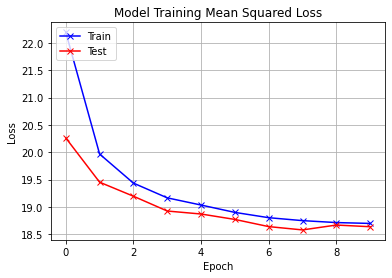

In [15]:
import matplotlib.pyplot as plt
# using the matplotlib library to plot the training and validation loss.
plt.plot(history.history['rmse'][::-1], marker="x", color='blue')
plt.plot(history.history['val_rmse'][::-1], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Model Training Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['train', 'test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], marker="x", color='blue')
plt.plot(history.history['val_loss'], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Model Training Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()


## Adversarial Attack on Trained Model:

## FGSM Attack on Trained Model

In [15]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.00232164


## IFGSM Attack on Trained Model

In [17]:

import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict(input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.0003


## PGD Attack on Trained Model

In [18]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=100, verbose=0)
     # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.00271109


## IPGD Attack on Trained Model

In [19]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=100, verbose=0)
     # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.00073366


# Defensive Distillation - Student/ Teacher Approach

## Student Model

In [20]:
# Function for the training process
# function returns the list of trained AP models and the model training history
def student_model(input_train, output_train, input_test, output_test,
          number_of_epochs, batch_size,dropout_rate,
          num_hidden_layers, nodes_per_layer,
          loss_fn,number_of_baseStations,number_of_beams):
    # The input_shape variable is assigned the shape of the input_train tensor, which will be used later to create the neural network model
    input_shape = list(input_train.shape[1:])

    # AP_models list stores all the models trained for each base station and beam.
    AP_models = []
    for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
        index_string = str(index / number_of_beams + 1)
        activation_function = 'relu'
        # building a sequential model with 11 dense layers and relu activaion function
        # Defining a multiplication factor for student and teacher model
        multiplication_factor_student_model = 0.5
        multiplication_factor_teacher_model = 1.0
        model = get_model(input_shape, multiplication_factor_student_model, model_name = 'Student')
        model.compile(loss=loss_fn, optimizer=optimizer,  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

        
        # Fitting the model with batch size, number of epochs, along with the validation data
        history = model.fit(input_train,
                            output_train[:, index:index + number_of_beams],
                            batch_size=batch_size,
                            epochs=number_of_epochs,
                            verbose=0,
                            validation_data=(input_test, output_test[:,index:index + number_of_beams]))
        # Opening a pickle file using the open function
        file_handler = open('history.pkl', 'wb') 
        # Storing the data in the pickle file
        pickle.dump(history.history, file_handler)
        file_handler.close()
        
        AP_models.append(model)
    return AP_models, history

## Student Model Training and Testing

In [21]:
#input_train = tf.expand_dims(input_train, axis=-1)
# Model training
Student_Model, history = student_model(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# Creating an empty dictionary to story the results
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Student_Model[id].predict(input_test, batch_size=100, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the mse value
print('rmse:',np.mean(rmse_values))

DeepLearning_Result['user_index']=test_idx

rmse: 0.004577678


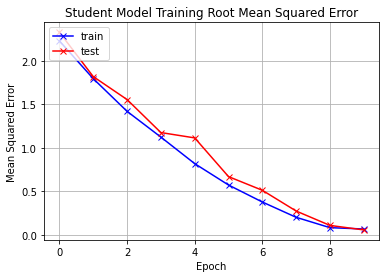

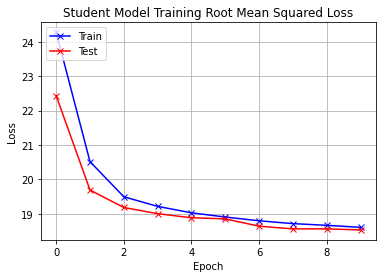

In [24]:
import matplotlib.pyplot as plt
# using the matplotlib library to plot the training and validation loss
plt.plot(history.history['rmse'][::-1], marker="x", color='blue')
plt.plot(history.history['val_rmse'][::-1], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Student Model Training Root Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['train', 'test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], marker="x", color='blue')
plt.plot(history.history['val_loss'], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Student Model Training Root Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()


## Adversarial Attacks on Student Model
# FGSM Attack 

In [25]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(Student_Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Student_Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.00232164


## IFGSM Attack

In [26]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.0012


## PGD Attack

In [27]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(Student_Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Student_Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.00201109


## IPGD Attack

In [28]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(Student_Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Student_Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.0001


# Teacher Model

In [29]:
# Function for the training process
def teacher_model(input_train, output_train, input_test, output_test,
          number_of_epochs, batch_size,dropout_rate,
          num_hidden_layers, nodes_per_layer,
          loss_fn,number_of_baseStations,number_of_beams):
    # The input_shape variable is assigned the shape of the input_train tensor, which will be used later to create the neural network model
    input_shape = list(input_train.shape[1:])

    # AP_models list stores all the models trained for each base station and beam.
    AP_models = []
    for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
        index_string = str(index / number_of_beams + 1)
        activation_function = 'relu'
        multiplication_factor_student_model = 0.5
        multiplication_factor_teacher_model = 1.0
        model = get_model(input_shape, multiplication_factor_teacher_model, model_name = 'Student')
        model.compile(loss=loss_fn, optimizer=optimizer,  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

        
        # Fitting the model with batch size, number of epochs, along with the validation data
        history = model.fit(input_train,
                            output_train[:, index:index + number_of_beams],
                            batch_size=batch_size,
                            epochs=number_of_epochs,
                            verbose=0,
                            validation_data=(input_test, output_test[:,index:index + number_of_beams]))
        # Opening a pickle file using the open function
        file_handler = open('history.pkl', 'wb') 
        # Storing the data in the pickle file
        pickle.dump(history.history, file_handler)
        file_handler.close()
        
        AP_models.append(model)
    return AP_models, history

## Teacher Model Training and Testing

In [30]:
#input_train = tf.expand_dims(input_train, axis=-1)
# Model training
Teacher_Model, history = teacher_model(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# Creating an empty dictionary to story the results
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Teacher_Model[id].predict( input_test, batch_size=100, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse_values.append(np.sqrt(mse))
# printing the mse value
print('rmse:',np.mean(rmse_values))
 
DeepLearning_Result['user_index']=test_idx

rmse: 0.0848764


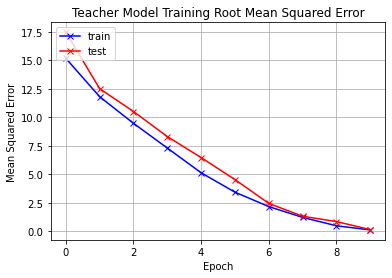

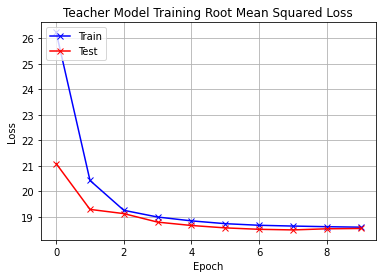

In [33]:
import matplotlib.pyplot as plt
# using the matplotlib library to plot the training and validation loss
plt.plot(history.history['rmse'][::-1], marker="x", color='blue')
plt.plot(history.history['val_rmse'][::-1], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Teacher Model Training Root Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['train', 'test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], marker="x", color='blue')
plt.plot(history.history['val_loss'], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Teacher Model Training Root Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()


## The Distiller model:

In [34]:
import keras
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [35]:
# Function for the training process
def train_distiller(In_train, Out_train, In_test, Out_test,
          nb_epoch, batch_size,dr,
          num_hidden_layers, nodes_per_layer,
          loss_fn,n_BS,n_beams):
    # The input_shape variable is assigned the shape of the input_train tensor, which will be used later to create the neural network model
    in_shp = list(In_train.shape[1:])

    # AP_models list stores all the models trained for each base station and beam.
    AP_models = []
    for idx in range(0, n_BS*n_beams-2, n_beams):
        idx_str = str(idx / n_beams + 1)
        act_func = 'relu'
        # building a sequential model with 11 dense layers and relu activaion function
        import keras
        for id in range(0,total_number_of_TX,1): 
            distiller = Distiller(student=Student_Model[id], teacher=Teacher_Model[id])
            loss_fn = keras.losses.MeanSquaredError()

            distiller.compile(optimizer='adam',
                                        metrics=['mse'],
                                        student_loss_fn=loss_fn,
                                        distillation_loss_fn=keras.losses.KLDivergence(),
                                        alpha=0.1,
                                        temperature=20)
            # Opening a pickle file using the open function
            filehandler = open('history.pkl', 'wb') 
            # Storing the data in the pickle file
            pickle.dump(history.history, filehandler)
            filehandler.close()
                        
            from keras.layers import Dense, Flatten
            student_copy = tf.keras.models.clone_model(distiller.student)
            for layer in student_copy.layers:
                    layer.trainable = False
            student_copy.add(Flatten())
            student_copy.add(Dense(512, activation='softmax'))
            student_copy.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            AP_models.append(student_copy)
    return AP_models, history

## Training and Testing Distiller Model

In [36]:
# Model training
Distiller_model_model, history = train_distiller(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# AP_models list stores all the models trained for each base station and beam
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Distiller_model_model[id].predict(input_test, batch_size=100, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse_values.append(np.sqrt(mse))
# printing the mse value
print('rmse:',np.mean(rmse_values))

DeepLearning_Result['user_index']=test_idx

rmse: 0.007665438


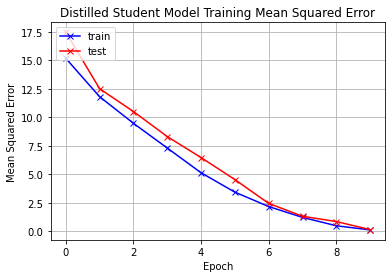

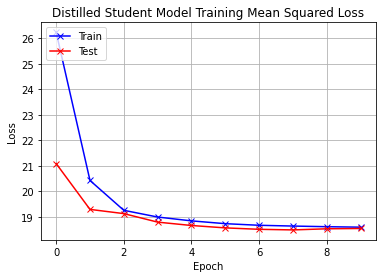

In [37]:
import matplotlib.pyplot as plt
# using the matplotlib library to plot the training and validation loss
plt.plot(history.history['rmse'][::-1], marker="x", color='blue')
plt.plot(history.history['val_rmse'][::-1], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Distilled Student Model Training Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['train', 'test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], marker="x", color='blue')
plt.plot(history.history['val_loss'], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Distilled Student Model Training Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()

### Adversarial Attack on Distilled  Model

## FGSM Attack

In [37]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(Distiller_model_model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Distiller_model_model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 0.000150831031


## IFGSM Attack

In [38]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 0.00057


## PGD Attack

In [39]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(Distiller_model_model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Distiller_model_model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 0.000141421356


## IPGD Attack

In [40]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(Distiller_model_model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Distiller_model_model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 3.3589857e-05


# The Adversarial Training - For a Normal Training Model

In [41]:
# Adversarial model training function
def adversarial_train(input_train, output_train, input_test, output_test,
          number_of_epochs, batch_size,dropout_rate,
          num_hidden_layers, nodes_per_layer,
          loss_fn,number_of_baseStations,number_of_beams, episilon):
    # The input_shape variable is assigned the shape of the input_train tensor, which will be used later to create the neural network model
    input_shape = list(input_train.shape[1:])
    # AP_models list stores all the models trained for each base station and beam.
    AP_models = []
    # Creating a model checkpoint: to save and load weights
    mcp_save = ModelCheckpoint('model.hinput_data5', save_best_only=True, verbose=0, 
                                   monitor='val_mean_squared_error', mode='min')
    
    for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
        index_string = str(index / number_of_beams + 1)
        activation_function = 'relu'
        # building the sequential model with 5 dense layer with relu activation function
        model = Sequential()
        model.add(Dense(100, input_dim=input_shape[0], activation=activation_function))
        model.add(Dense(100, activation=activation_function))
        model.add(Dense(100, activation=activation_function))
        model.add(Dense(100, activation=activation_function))
        model.add(Dense(number_of_beams, activation=activation_function))
        # Compiling the model using rmsprop optimizer, loss function = categorical cross entropy and mse evaluation metric
        model.compile(loss=loss_fn, optimizer='rmsprop', metrics=['mean_squared_error'])
        
        # Fitting the model with a batch size = 100, number of epochs = 10, along with the validation data
        history = model.fit(input_train,
                            output_train[:, index:index + number_of_beams],
                            batch_size=batch_size,
                            epochs=number_of_epochs,
                            verbose=0,
                            validation_data=(input_test, output_test[:,index:index + number_of_beams]))
        
        callbacks = [mcp_save]
        for _ in range(10):
            # Adversarial training with FGSM_attack attack
            input_train_adv = FGSM_attack(model, input_train,output_train, number_of_baseStations, number_of_beams)
            input_train_adv = np.concatenate((input_train, input_train_adv), axis=0)
            
            output_train_adv = np.concatenate((output_train, output_train), axis=0)
            
            # Fitting the adversarially trained model with FGSM_attack attack
            history = model.fit(input_train_adv,
                                output_train_adv[:, index:index + number_of_beams],
                                batch_size=batch_size,
                                epochs=number_of_epochs*3,
                                verbose=0,
                                callbacks=callbacks,
                                validation_data=(input_test, output_test[:,index:index + number_of_beams]))
            # Saving and load the weights of the models in model.hinput_data5 file
            model.load_weights('model.hinput_data5')
        
        AP_models.append(model)
    return AP_models

In [ ]:
AP_models = adversarial_train(input_train, output_train, input_test, output_test,
                      number_of_epochs, batch_size,dropout_rate,
                      num_hidden_layers, nodes_per_layer,
                      loss_fn,total_number_of_TX,total_number_of_beams,episilon)

## PGD Attack

In [44]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(AP_models[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=AP_models[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.000281069386


## IPGD Attack

In [45]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(AP_models[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=AP_models[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.0003


## FGSM Attack

In [46]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(AP_models[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=AP_models[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.000316227766


## IFGSM Attack

In [47]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse 0.000577983


## Private Model

In [48]:
# importing the DPKerasSGDOptimizer for implementing differential privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer


# We will be using l2 norm gradient clipping: l2 norm clipping is used to determine the highest Euclidean norm of each elevation,by each training instance from a minibatch. This setting limits the optimizer's sensitivity to specific training points.
l2_norm_clip = 1.5
# The noise multiplier is used to determine how much noise is sampled and added to gradients prior to the optimizer applying them. More noise typically equals better privacy.
noise_multiplier = 1.3
# initalizing the total number of microbatches that needs to be considered: it is needed to limit how much each individual training point sampled in a minibatch can influence the resulting gradient computation.
num_microbatches = 1
# initializing learning rate: it is used to govern the pace at which an algorithm updates or learns the values of a parameter estimate.
learning_rate = 0.25

# we will be using tensorflow privacy keras sgd optimizer andcCalculate the loss' gradient. To ensure that each gradient has a known maximum Euclidean norm, clip gradients in accordance with the training example included in the minibatch.
# The clipped gradients should be given random noise.These clipped and noisy gradients are multiplied by the learning rate, and the result is then used to update the model parameters.
optimizer = DPKerasSGDOptimizer(l2_norm_clip=l2_norm_clip,noise_multiplier=noise_multiplier,num_microbatches = num_microbatches, learning_rate=learning_rate)

## Training and Testing Differentially Private DNN

In [49]:
i=i+1
DL_size=int(total_num_of_users*size_ratio)

# initilizing a random seed
np.random.seed(2016)
number_of_examples = DL_size
train_size  = int(DL_size * 0.8)
test_size   = int(total_num_of_users*.2)

train_idx = np.random.choice(range(0,total_num_of_users), size=train_size, replace=False)
remaning_idx = set(range(0,total_num_of_users))-set(train_idx)
test_idx= list(set(np.random.choice(list(remaning_idx), size=test_size, replace=False)))

input_train = input[train_idx]
input_test =  input[test_idx] 

output_train = output[train_idx]
output_test = output[test_idx]

#input_train, input_test, output_train, output_test =  trainput_test_split(input, output, test_size=0.33)

# Learning model parameters
batch_size = 100  
dropout_rate = 0.05 
number_of_epochs = 10  # number of epochs
# dropout rate  
num_hidden_layers=10 # number of hidden layers
nodes_per_layer= input_train.shape[1] # 3 nodes per layer 
loss_fn='CategoricalCrossentropy' # loss function
# episilon value
episilon = 2.0 * 16.0 / 255.0
#input_train = tf.expand_dims(input_train, axis=-1)
# Model training
Model, history = train(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# Creating an empty dictionary to story the results
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Model[id].predict(input_test, batch_size=10, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))


DeepLearning_Result['user_index']=test_idx

rmse: 0.0823768


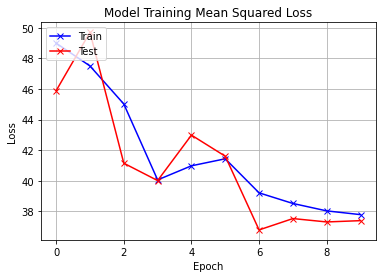

In [46]:
plt.plot(history.history['loss'][:10], marker="x", color='blue')
plt.plot(history.history['val_loss'][:10], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Model Training Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()

## Adversarial Attack on Private DNN Model:

## FGSM Attack

In [50]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict(input_test, batch_size=1, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1.19582607e-05


## IFGSM Attack

In [51]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 9.875867e-06


## PGD Attack

In [52]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(AP_models[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=AP_models[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1e-05


## IPGD Attack

In [53]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(AP_models[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=AP_models[id].predict( input_test_adv, batch_size=100, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 5.493478e-06


## Private Student Model

In [54]:
#input_train = tf.expand_dims(input_train, axis=-1)
# Model training
Student_Model, history = student_model(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# Creating an empty dictionary to story the results
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Student_Model[id].predict(input_test, batch_size=10, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the mse value
print('rmse:',np.mean(rmse_values))

DeepLearning_Result['user_index']=test_idx

rmse: 0.04756879


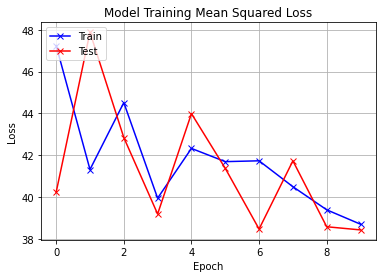

In [68]:
plt.plot(history.history['loss'][:10], marker="x", color='blue')
plt.plot(history.history['val_loss'][:10], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Model Training Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()

## Adversarial Attacks on Private Student Model
## FGSM Attack

In [69]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(Student_Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Student_Model[id].predict(input_test, batch_size=5, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 2.28035085e-06


## IFGSM Attack

In [70]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Student_Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Student_Model[id].predict(input_test, batch_size=5, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1.4756847e-06


## PGD Attack

In [71]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(Student_Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Student_Model[id].predict(input_test, batch_size=5, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1e-06


## IPGD Attack

In [72]:
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(Student_Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Student_Model[id].predict(input_test, batch_size=5, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 8.9679687e-07


## Private Teacher Model

In [73]:
#input_train = tf.expand_dims(input_train, axis=-1)
# Model training
Teacher_Model, history = teacher_model(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# Creating an empty dictionary to story the results
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Teacher_Model[id].predict( input_test, batch_size=10, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse_values.append(np.sqrt(mse))
# printing the mse value
print('rmse:',np.mean(rmse_values))

DeepLearning_Result['user_index']=test_idx

rmse: 0.013764


In [71]:
plt.plot(history.history['loss'][:10], marker="x", color='blue')
plt.plot(history.history['val_loss'][:10], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Model Training Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()

## Private Distiller Model

In [74]:
# Model training
Distiller_model_model, history = train_distiller(input_train, output_train, input_test, output_test,
                                      number_of_epochs, batch_size,dropout_rate,
                                      num_hidden_layers, nodes_per_layer,
                                      loss_fn,total_number_of_TX,total_number_of_beams)
# AP_models list stores all the models trained for each base station and beam
DeepLearning_Result={}
# Creating an empty list to store the mse values
rmse_values = []
for id in range(0,total_number_of_TX,1): 
    PredictedBeams=Distiller_model_model[id].predict(input_test, batch_size=10, verbose=0)

    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]
    
    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    # Appending the mean square error values to the empty list
    rmse_values.append(np.sqrt(mse))
# printing the mse value
print('rmse:',np.mean(rmse_values))

DeepLearning_Result['user_index']=test_idx

rmse: 0.0078475489


In [73]:
plt.plot(history.history['loss'][:10], marker="x", color='blue')
plt.plot(history.history['val_loss'][:10], marker="x", color='red')
# title, xlabel, and ylabel functions are used to set the title and axis labels for the plots
plt.title('Model Training Mean Squared Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# Creating the legend using legend function
plt.legend(['Train', 'Test'], loc='upper left')
# adding a grid to the plot using grid function
plt.grid()
plt.show()

## Attack on Private Student Distiller Model
## FGSM

In [75]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(Distiller_model_model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Distiller_model_model[id].predict( input_test_adv, batch_size=1, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 2.28035085e-06


## IFGSM Attack

In [76]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Distiller_model_model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Distiller_model_model[id].predict( input_test_adv, batch_size=1, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1.4756847e-06


## PGD Attack

In [77]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(Distiller_model_model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Distiller_model_model[id].predict( input_test_adv, batch_size=1, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1e-06


## IPGD Attack

In [78]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(Distiller_model_model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Distiller_model_model[id].predict( input_test_adv, batch_size=1, verbose=0)
    # predicted beams and optimal beams in the empty dictionary
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
     # Appending the mean square error values to the empty list
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 8.9679687e-07


## Adversarial Training

In [79]:
# Adversarial model training function
def adversarial_train(input_train, output_train, input_test, output_test,
          number_of_epochs, batch_size,dropout_rate,
          num_hidden_layers, nodes_per_layer,
          loss_fn,number_of_baseStations,number_of_beams, episilon):
    # The input_shape variable is assigned the shape of the input_train tensor, which will be used later to create the neural network model
    input_shape = list(input_train.shape[1:])
    # AP_models list stores all the models trained for each base station and beam.
    AP_models = []
    # Creating a model checkpoint: to save and load weights
    mcp_save = ModelCheckpoint('model.hinput_data5', save_best_only=True, verbose=0, 
                                   monitor='val_mean_squared_error', mode='min')
    
    for index in range(0, number_of_baseStations*number_of_beams-2, number_of_beams):
        index_string = str(index / number_of_beams + 1)
        activation_function = 'relu'
        # building the sequential model with 5 dense layer with relu activation function
        model = Sequential()
        model.add(Dense(100, input_dim=input_shape[0], activation=activation_function))
        model.add(Dense(100, activation=activation_function))
        model.add(Dense(100, activation=activation_function))
        model.add(Dense(100, activation=activation_function))
        model.add(Dense(number_of_beams, activation=activation_function))
        # Compiling the model using rmsprop optimizer, loss function = categorical cross entropy and mse evaluation metric
        model.compile(loss=loss_fn, optimizer='rmsprop', metrics=['mean_squared_error'])
        
        # Fitting the model with a batch size = 100, number of epochs = 10, along with the validation data
        history = model.fit(input_train,
                            output_train[:, index:index + number_of_beams],
                            batch_size=batch_size,
                            epochs=number_of_epochs,
                            verbose=0,
                            validation_data=(input_test, output_test[:,index:index + number_of_beams]))
        
        callbacks = [mcp_save]
        for _ in range(10):
            # Adversarial training with FGSM_attack attack
            input_train_adv = FGSM_attack(model, input_train,output_train, number_of_baseStations, number_of_beams)
            input_train_adv = np.concatenate((input_train, input_train_adv), axis=0)
            
            output_train_adv = np.concatenate((output_train, output_train), axis=0)
            
            # Fitting the adversarially trained model with FGSM_attack attack
            history = model.fit(input_train_adv,
                                output_train_adv[:, index:index + number_of_beams],
                                batch_size=batch_size,
                                epochs=number_of_epochs*3,
                                verbose=0,
                                callbacks=callbacks,
                                validation_data=(input_test, output_test[:,index:index + number_of_beams]))
            # Saving and load the weights of the models in model.hinput_data5 file
            model.load_weights('model.hinput_data5')
        
        AP_models.append(model)
    return AP_models

## IFGSM Attack

In [80]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iFGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=10, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 9.875867e-06


## FGSM Attack

In [81]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = FGSM_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=10, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1.19582607e-05


## PGD Attack

In [82]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = PGD_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=10, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 1e-05


## IPGD Attack

In [83]:
import warnings
warnings.filterwarnings('ignore')
# Creating an empty dictionary to store the results of the deep learning model
DeepLearning_Result={}
# Creating an empty list to store the mean squared error values for each predicted beam
mse_list = []
# Initializing a loop over each transmitter (TX) in the total_number_of_TX range
for id in range(0,total_number_of_TX,1): 
    # !!!!! Attack generation !!!!
    input_test_adv = iPGD_attack(Model[id], input_test,output_test,total_number_of_TX,total_number_of_beams,episilon)
    # predict the beams based on the adversarial input data
    PredictedBeams=Model[id].predict( input_test_adv, batch_size=10, verbose=0)
    # predicted beams and optimal beams in the empty dictionary 
    DeepLearning_Result['TX'+str(id+1)+'Pred_Beams']=PredictedBeams
    DeepLearning_Result['TX'+str(id+1)+'Opt_Beams']=output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams]

    # Calculating the mean squared error of all the predicted beams
    mse = mean_squared_error(output_test[:,id*total_number_of_beams:(id+1)*total_number_of_beams],PredictedBeams)
    rmse = np.sqrt(mse)
    # Appending the mean square error values to the empty list
    rmse_values.append(rmse)
# printing the rmse value
print('rmse:',np.mean(rmse_values))

rmse: 5.493478e-06
